In [3]:
# Chargement et préparation des données
import pandas as pd

# Chargement des deux fichiers
df_products = pd.read_csv("counterfeit_products.csv")
df_transactions = pd.read_csv("_counterfeit_transactions.csv")

# Aperçu des données
print("Produits :")
display(df_products.head())

print("Transactions :")
display(df_transactions.head())



Produits :


,product_id,seller_id,category,brand,price,seller_rating,seller_reviews,product_images,description_length,shipping_time_days,...,shipping_origin,views,purchases,wishlist_adds,certification_badges,warranty_months,bulk_orders,unusual_payment_patterns,ip_location_mismatch,is_counterfeit
0,dcb12716,seller_5426,Electronics,DigitalPro,218.54,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,20.72,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.87,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.27,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.98,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False


Transactions :


,transaction_id,customer_id,transaction_date,customer_age,customer_location,quantity,unit_price,total_amount,payment_method,shipping_speed,customer_history_orders,discount_applied,discount_percentage,shipping_cost,delivery_time_days,refund_requested,velocity_flag,geolocation_mismatch,device_fingerprint_new,involves_counterfeit
0,TXN_957334,CUST_11907,2024-10-12 03:52:13,22,JP,1,199.66,199.66,Debit Card,Express,17,False,0.0,5.39,26,False,False,False,False,False
1,TXN_246397,CUST_27641,2024-08-18 00:36:57,62,DE,4,116.01,464.03,PayPal,Express,36,False,0.0,8.18,25,False,False,False,False,False
2,TXN_403072,CUST_78628,2024-08-19 22:21:30,75,DE,1,42.04,42.04,Credit Card,Priority,21,False,0.0,8.61,27,False,False,False,False,False
3,TXN_848560,CUST_98579,2025-04-16 18:49:39,56,BR,3,147.69,443.08,Credit Card,Standard,14,True,48.7,17.00,26,False,False,False,False,False
4,TXN_270817,CUST_67519,2024-10-06 13:30:52,19,IN,4,40.70,162.80,PayPal,Priority,48,False,0.0,20.53,1,False,False,True,False,False


In [7]:
# Nettoyage des noms de colonnes
df_products.columns = df_products.columns.str.strip().str.lower().str.replace(" ", "_")

# Conversion des colonnes numériques
df_products["price"] = pd.to_numeric(df_products["price"].replace('[\$,]', '', regex=True), errors='coerce')
df_products["seller_rating"] = pd.to_numeric(df_products["seller_rating"], errors='coerce')
df_products["seller_reviews"] = pd.to_numeric(df_products["seller_reviews"], errors='coerce')

# Suppression des doublons
df_products.drop_duplicates(inplace=True)

# Suppression des lignes avec des valeurs manquantes dans les colonnes clés
df_products.dropna(subset=["price", "seller_rating", "seller_reviews", "brand", "description_length"], inplace=True)

# Suppression des valeurs aberrantes
df_products = df_products[(df_products["price"] > 1) & (df_products["price"] < 10000)]
df_products = df_products[(df_products["seller_rating"] >= 0) & (df_products["seller_rating"] <= 5)]



In [8]:
df_products[["description_length"]].head()


,description_length
0,220
1,179
2,100
3,976
4,589


In [9]:
# Imports pour visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Style par défaut
sns.set(style="whitegrid")


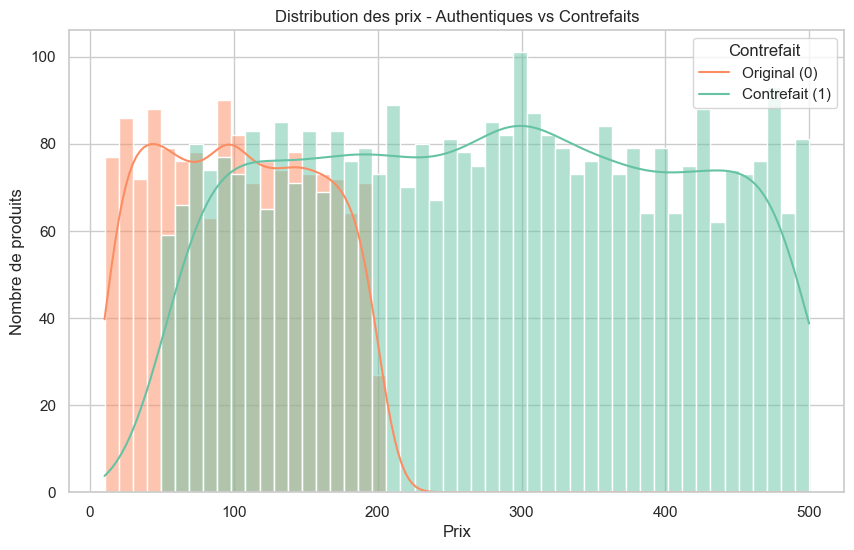

In [10]:
# Distribution des prix (authentiques vs contrefaits)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_products, x="price", hue="is_counterfeit", bins=50, kde=True, palette="Set2")
plt.title("Distribution des prix - Authentiques vs Contrefaits")
plt.xlabel("Prix")
plt.ylabel("Nombre de produits")
plt.legend(title="Contrefait", labels=["Original (0)", "Contrefait (1)"])
plt.show()


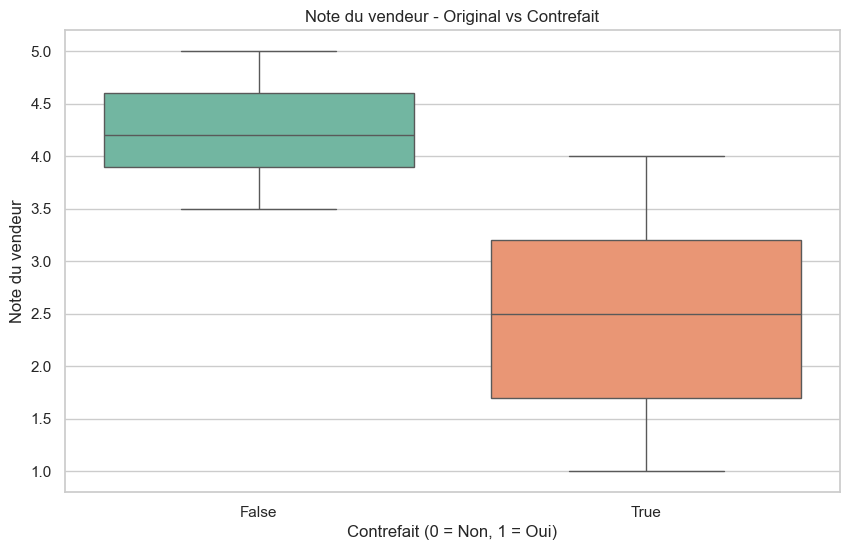

In [14]:
# Note du vendeur (seller_rating) selon la contrefaçon
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_products, x="is_counterfeit", y="seller_rating", hue="is_counterfeit", palette="Set2", dodge=False)
plt.title("Note du vendeur - Original vs Contrefait")
plt.xlabel("Contrefait (0 = Non, 1 = Oui)")
plt.ylabel("Note du vendeur")
plt.legend([],[], frameon=False)  # Supprimer légende redondante
plt.show()



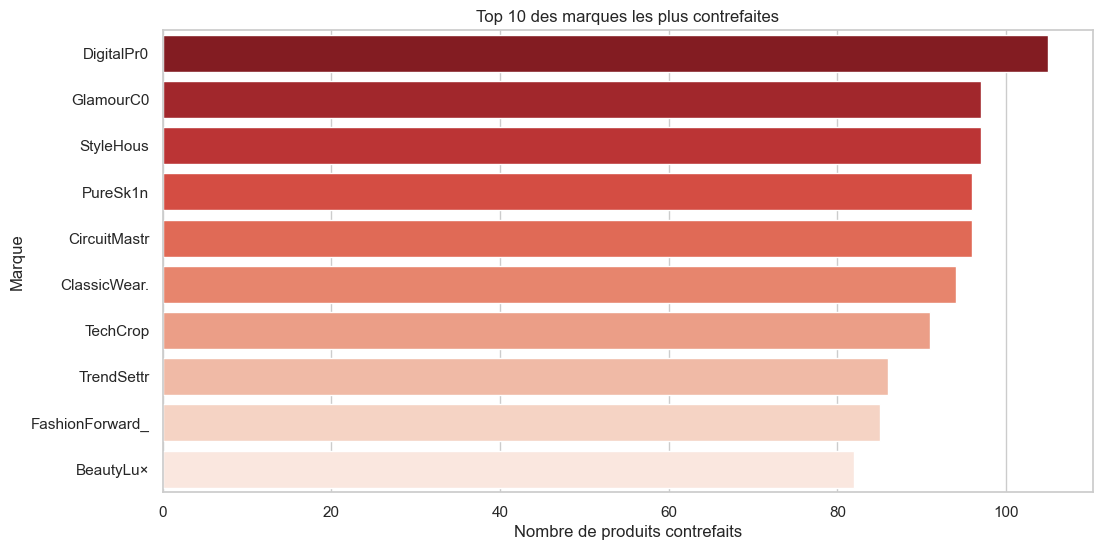

In [18]:
# Marques les plus contrefaites
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, hue=top_brands.index, palette="Reds_r", legend=False)
plt.title("Top 10 des marques les plus contrefaites")
plt.xlabel("Nombre de produits contrefaits")
plt.ylabel("Marque")
plt.show()



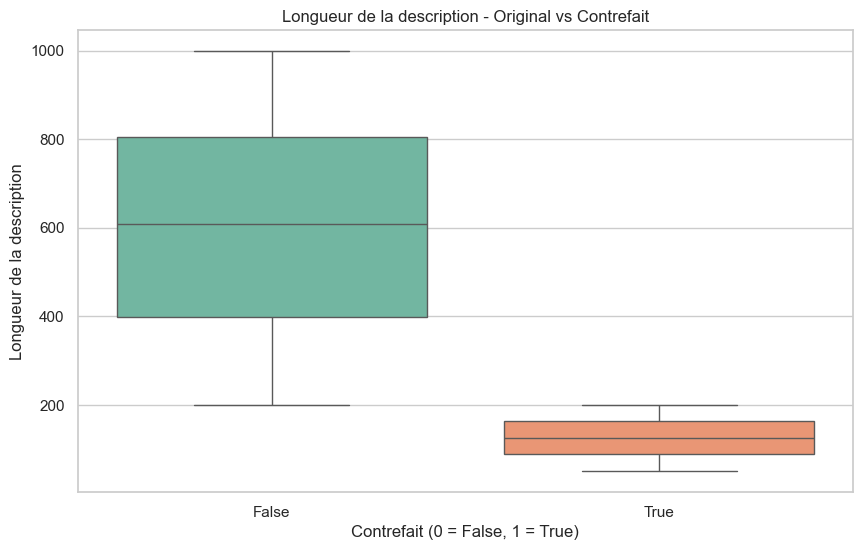

In [21]:
#Longueur de la description vs contrefaçon (boîte à moustaches)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_products, x="is_counterfeit", y="description_length", hue="is_counterfeit", palette="Set2", dodge=False)
plt.title("Longueur de la description - Original vs Contrefait")
plt.xlabel("Contrefait (0 = False, 1 = True)")
plt.ylabel("Longueur de la description")
plt.legend([],[], frameon=False)
plt.show()


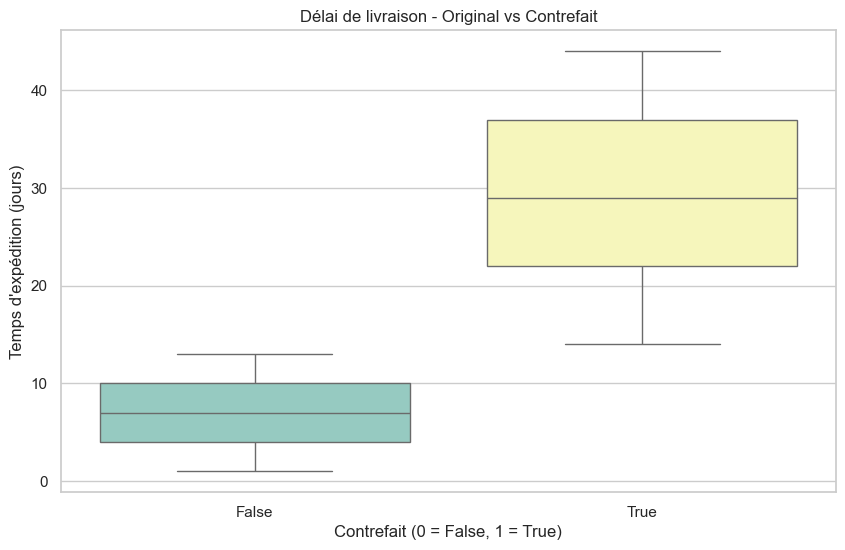

In [20]:
#Délai de livraison
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_products, x="is_counterfeit", y="shipping_time_days", hue="is_counterfeit", palette="Set3", dodge=False)
plt.title("Délai de livraison - Original vs Contrefait")
plt.xlabel("Contrefait (0 = False, 1 = True)")
plt.ylabel("Temps d'expédition (jours)")
plt.legend([],[], frameon=False)
plt.show()


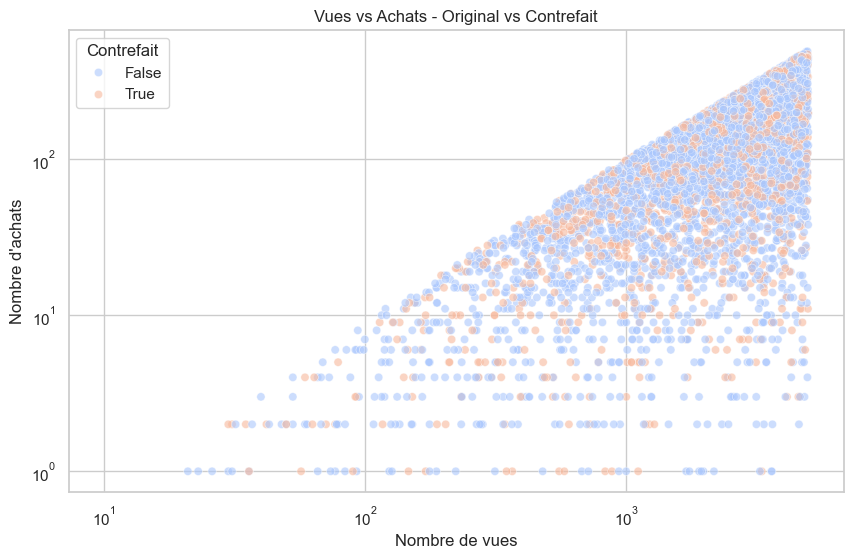

In [22]:
#Popularité : vues/achats
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_products, x="views", y="purchases", hue="is_counterfeit", palette="coolwarm", alpha=0.6)
plt.title("Vues vs Achats - Original vs Contrefait")
plt.xlabel("Nombre de vues")
plt.ylabel("Nombre d'achats")
plt.legend(title="Contrefait")
plt.xscale("log")  # Si les valeurs sont très dispersées
plt.yscale("log")
plt.show()
